# Logistic regression using scikit learn on the Iris dataset

Examples taken from the Scikit-Learn [web site](http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

In [1]:
import sklearn
from sklearn import datasets

from sklearn import linear_model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from IPython.core.display import HTML
# HTML("<style>.container { width:100% !important; }</style>")

Load the Iris dataset

In [2]:
iris = datasets.load_iris()

Display the four features in the dataset

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Create a three class logistic regression classifier

In [4]:
# C is the inverse of regularization parameter (smaller values specify strong regularization)
logreg = linear_model.LogisticRegression(C=1e5)

Using two factors at a time fit a logistic regression and display the number of incorrectly predicted species

In [5]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
prediction_errors  = []
for items in itertools.combinations(df.columns.values, r=2):
    X = df[list(items)].as_matrix()
    logreg.fit(X, iris.target)
    iris_predict = logreg.predict(X)
    diff = iris.target - iris_predict
    prediction_errors.append([items[0], items[1], diff.nonzero()[0].size])
pd.DataFrame(prediction_errors, columns=['measure 1', 'measure 2', 'incorrect predictions'])

,measure 1,measure 2,incorrect predictions
0,sepal length (cm),sepal width (cm),29
1,sepal length (cm),petal length (cm),6
2,sepal length (cm),petal width (cm),8
3,sepal width (cm),petal length (cm),7
4,sepal width (cm),petal width (cm),7
5,petal length (cm),petal width (cm),6


Use principal component analysis to reduce 4 dimensions to 2

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_proj = pca.fit_transform(iris['data'])
print(iris['data'].shape)
print(iris_proj.shape)

(150, 4)
(150, 2)


Convert reduced dataset to pandas dataframe and plot

In [7]:
df2 = pd.DataFrame(iris_proj, columns=['pc1', 'pc2'])
df2['species'] = pd.Categorical.from_codes(
    iris.target, categories=iris.target_names, ordered=True)

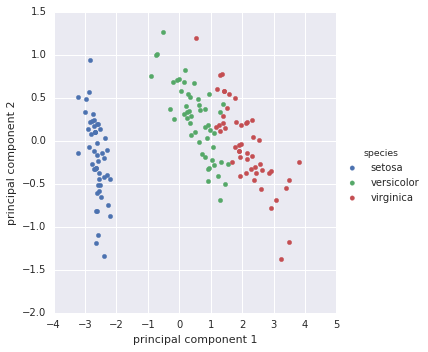

In [8]:
g = sns.FacetGrid(df2, hue='species', size=5)
g.map(plt.scatter, 'pc1', 'pc2')
g.set_xlabels('principal component 1')
g.set_ylabels('principal component 2')
g.add_legend()

Use the two principal components to predict the species and display the number of incorrectly predicted species

In [9]:
logreg.fit(iris_proj, iris.target)
iris_predict = logreg.predict(iris_proj)
diff = iris.target - iris_predict
print(['principal component 1', 'principal component 2', diff.nonzero()[0].size])

['principal component 1', 'principal component 2', 5]


The two principal components do better than any combination of two measurements

Create array with four values 0, 1, 2 for irises and 3 for mis-predicted value

In [10]:
predict_series = iris.target
predict_series[diff.astype(bool)] = 3
names = list(iris.target_names)
names.extend(['mis-predicted'])
df2['prediction'] = pd.Categorical.from_codes(
    predict_series, categories=names, ordered=True)

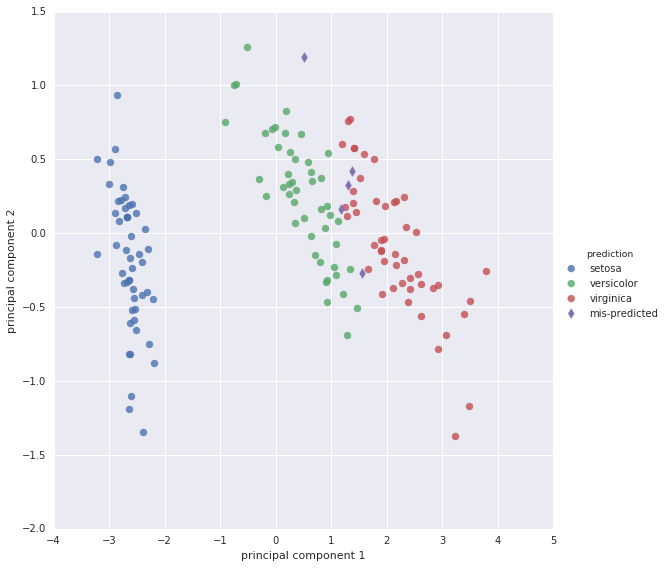

In [12]:
hue_options = {
    'marker': ['o', 'o', 'o', 'd'],
    'alpha': [0.8, 0.8, 0.8, 1]
}
sns.despine()
g = sns.FacetGrid(df2, hue='prediction', hue_kws=hue_options, size=8)
g = g.map(plt.scatter, 'pc1', 'pc2', s=50)
g.set_xlabels('principal component 1')
g.set_ylabels('principal component 2')
g.add_legend()